<a href="https://colab.research.google.com/github/n8mcdunna/DS-Unit-1-Sprint-2-Statistics/blob/master/Nathan_DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

*Updated July 17, 2020*

In this sprint challenge you will look at a dataset of echocardiogram data and other health measures of individuals who have suffered heart attacks using the following dataset:

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. **survival** -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. **still-alive** -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. **age-at-heart-attack** -- age in years when heart attack occurred
4. **pericardial-effusion** -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. **fractional-shortening** -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. **epss** -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. **lvdd** -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. **wall-motion-score** -- a measure of how the segments of the left ventricle are moving
9. **wall-motion-index** -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. **mult** -- a derivate var which can be ignored
11. **name** -- the name of the patient (I have replaced them with "name")
12. **group** -- meaningless, ignore it
13. **alive-at-1** -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.

- There is an anomaly with row 50 of the data (index position 49). It does not have enough columns. Please include `skiprows=[49]` in your `read_csv()` function call. You must indicate specific rows to be skipped as a list or else `read_csv()` will skip all rows up to and including the row to be skipped. 

- Your dataset should initially have 131 rows and 13 columns

- Use the attribute information listed above to name your column headers.

- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes the missing value indicators as NaN.

- The `name` column has been altered to only include the string 'name' to protect the privacy of patients. The `group` column is also meaningless. Please drop both of these columns, you will then have 11 columns usable data.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
!wget https://archive.ics.uci.edu/ml/datasets/Echocardiogram

--2020-09-11 15:16:05--  https://archive.ics.uci.edu/ml/datasets/Echocardiogram
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Echocardiogram’

Echocardiogram          [ <=>                ]  13.22K  --.-KB/s    in 0.1s    

2020-09-11 15:16:06 (89.5 KB/s) - ‘Echocardiogram’ saved [13542]



In [70]:
df = pd.read_csv('/content/echocardiogram.data', skiprows= [49])
print(df.shape)
df.head()

(130, 13)


,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


In [71]:
# Creating the column names
column_names = ['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion', 'fract_short', 'epss', 'lvdd', 'wm_score', 'wm_index', 'mult', 'name', 'group', 'alive_at_1']
len(column_names)

13

In [72]:
df.columns = column_names
df.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,name,group,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0


In [73]:
# Removing unnecessary columns
df = df.drop(labels= ['name', 'group'], axis= 1)
print(df.shape)
df.head()

(130, 11)


,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,0
1,16,0,55,0,0.260,4,3.420,14,1,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,0


In [74]:
# Check for missing values(?) and replace with NaN
df = df.replace('?', np.nan)
df.isnull().sum()

survival                 1
still_alive              0
age_at_heart_attack      5
pericardial_effusion     0
fract_short              7
epss                    14
lvdd                    10
wm_score                 3
wm_index                 1
mult                     3
alive_at_1              57
dtype: int64

In [75]:
df.head(30)

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,0
1,16,0,55,0,0.260,4,3.420,14,1,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,0
5,13,0,62,0,0.230,31,5.430,22.5,1.875,0.857,0
6,50,0,60,0,0.330,8,5.250,14,1,1,0
7,19,0,46,0,0.340,0,5.090,16,1.140,1.003,0
8,25,0,54,0,0.140,13,4.490,15.5,1.190,0.930,0
9,10,1,77,0,0.130,16,4.230,18,1.800,0.714,1


## Part 2 - Exploring data, Testing hypotheses

### Explore the Data

Explore the data: you can use whatever approach (tables, Pandas EDA functions, visualizations, etc.) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand which variables are numeric and which are categorical -in order to identify columns that might be suitable for t-tests, chi^2 tests and the building of confidence intervals. 

When exploring the categorical data it may be helpful to create use crosstabs aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table) in order to compare the relationships between categorical variables.

It will also be helpful to keep an eye out for variables that you could use to split the data into two different samples for conducting two-sample t-tests.

Remember, numeric variables can still be categorical if they are represented using discrete (countable e.g. - just a few) values.

---

### Hypothesis Tests

Once you feel like you have a good handle on the types of variables in the dataset, please conduct at least:

- Two 1-sample t-tests
- Two 2-sample t-tests
- Two chi^2 tests

For each test please write out your: 
- null hypothesis
- alternative hypothesis
- confidence level
- conclusion

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end.


### Exploratory Data Analysis

In [76]:
df.describe()

,still_alive,pericardial_effusion
count,130.000000,130.000000
mean,0.330769,0.184615
std,0.472310,0.389486
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [77]:
df.describe(exclude= 'number')

,survival,age_at_heart_attack,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
count,129,125,123,116,120,127,129,127,73
unique,55,38,72,91,104,46,65,30,2
top,0.5,62,0.20,0,4.48,14,1,0.857,0
freq,6,10,6,7,3,20,41,29,49


### One-Sample T-tests

In [42]:
from scipy import stats

In [158]:
df.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72.0,0,0.380,6,4.100,14,1.700,0.588,0
1,16,0,55.0,0,0.260,4,3.420,14,1,1,0
2,57,0,60.0,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57.0,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68.0,0,0.260,5,4.310,12,1,0.857,0


In [164]:
sample = df.sample(n= 10)
print('population ', df['pericardial_effusion'].mean())

stats.ttest_1samp(a= sample['pericardial_effusion'], popmean= 0.1846)


population  0.18461538461538463


Ttest_1sampResult(statistic=0.11550000000000016, pvalue=0.9105847851243518)

##Testing probability of pericardial effusion
### Null hypothesis: The mean of pericardial effusion is 0.1846. 
### Alternative hypothesis: The mean of pericardial effusion is not 0.1846.
### Conclusion: Based on the p-value of 0.91 we reject the null hypothesis.

In [87]:
stats.ttest_1samp(df['pericardial_effusion'], 1)

Ttest_1sampResult(statistic=-23.86943652456002, pvalue=3.661455082928377e-49)

##Testing probability of Patient Being Alive.
### Null hypothesis: The patient is still alive 33% of the time.
### Alternative hypothesis: The patient is not still alive 33% of the time.
### Conclusion: Based on the p-value of 0.04 we fail to reject the null hypothesis with a confidence level of over 95%.

In [166]:
sample = df.sample(n= 10)
print('population ', df['still_alive'].mean())

stats.ttest_1samp(a= sample['still_alive'], popmean= 0.3307)

population  0.33076923076923076


Ttest_1sampResult(statistic=-2.307, pvalue=0.046464078895375086)

In [113]:
stats.ttest_1samp(df['still_alive'], 1)

Ttest_1sampResult(statistic=-16.155494421403514, pvalue=8.724913304838833e-33)

## Conclusion for Still Alive
Based on the very small p_value of 8.7e-33 the null hypothesis of the patient still being alive is rejected with a confidence level greater than 99%. 

### Two-Sample T-tests

## Testing pericardial effusion and whether patient survives
### Null hypothesis: Patients with pericardial effusion affects whether they are still alive.
### Alternative hypothesis: Patients with pericardial effusion does not affect their survival.

In [115]:
# Creating two samples based on pericardial effusion
fluid = df[df['pericardial_effusion'] == 1]
no_fluid = df[df['pericardial_effusion'] == 0]

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,0
1,16,0,55,0,0.260,4,3.420,14,1,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,0


In [117]:
stats.ttest_ind(fluid['still_alive'], no_fluid['still_alive'])

Ttest_indResult(statistic=1.9653613296954275, pvalue=0.05153774930594359)

### Conclusion: With a confidence level of 90% (0.1) the p-value of 0.051 fails to reject the null hypothesis.

## Testing age at heart attack and whether patient survives
### Null hypothesis: There is a difference between age groups and whether they are still alive.
### Alternative hypothesis: There is no difference between age groups and still being alive.

In [127]:
df.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,0
1,16,0,55,0,0.260,4,3.420,14,1,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,0


In [128]:
# Changing age from strings to floats
df['age_at_heart_attack'] = df['age_at_heart_attack'].apply(float)
df.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72.0,0,0.380,6,4.100,14,1.700,0.588,0
1,16,0,55.0,0,0.260,4,3.420,14,1,1,0
2,57,0,60.0,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57.0,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68.0,0,0.260,5,4.310,12,1,0.857,0


In [130]:
# Dividing the age at heart attack into two samples
over_55 = df[df['age_at_heart_attack'] > 55]
under_55 = df[df['age_at_heart_attack'] <= 55]
over_55.head()

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fract_short,epss,lvdd,wm_score,wm_index,mult,alive_at_1
0,19,0,72.0,0,0.380,6,4.100,14,1.700,0.588,0
2,57,0,60.0,0,0.253,12.062,4.603,16,1.450,0.788,0
3,19,1,57.0,0,0.160,22,5.750,18,2.250,0.571,0
4,26,0,68.0,0,0.260,5,4.310,12,1,0.857,0
5,13,0,62.0,0,0.230,31,5.430,22.5,1.875,0.857,0


In [131]:
stats.ttest_ind(over_55['still_alive'], under_55['still_alive'], nan_policy = 'omit')

Ttest_indResult(statistic=2.66195920947414, pvalue=0.00880670917995739)

## Conclusion: Based on the p-value of 0.008 we fail to reject the null hypothesis with a confidence level of over 99%. There is a difference in being still alive between the age groups.

### Chi^2 T-tests

In [132]:
from scipy.stats import chi2_contingency

In [134]:
g, p, dof, expctd = chi2_contingency(pd.crosstab(df['pericardial_effusion'],df['still_alive']))
p

0.08704457096657221

##Testing for relationship between pericardial effusion and still alive.
### Null hypothesis: There IS a relationship between pericardial effusion and still alive.
### Alternative hypothesis: There IS NOT a relationship.
### Conclusion: Based on the p-value of 0.08 we fail to reject the null hypothesis with a confidence level of over 90%.

In [136]:
g, p, dof, expcted = chi2_contingency(pd.crosstab(df['pericardial_effusion'],df['age_at_heart_attack']))
p

0.6033651907741451

##Testing for relationship between pericardial effusion and age at heart attack.
###Null hypothesis: There IS a relationship between pericardial effusion and age at heart attack.
###Alternative hypothesis: There IS NOT a relationship.
###Conclusion: Based on the p-value of 0.6 we reject the null hypothesis.

## Part 3 - Confidence Intervals

- Pick two of the samples that you used above in your t-tests and please find a 95% confidence interval around their sample means in order to communicate the level of precision with which we are able to estimate them.

- Please plot both 95% confidence intervals to display them visually. You may choose any suitable the plotting method.


In [ ]:
from scipy.stats import t
import seaborn as sns

In [143]:
mean = df['age_at_heart_attack'].mean()
sd = df['age_at_heart_attack'].std()
n = df['age_at_heart_attack'].count()
se = sd / n ** 0.5

ci = t.interval(alpha= 0.95, df= (n-1), loc= mean, scale= se)


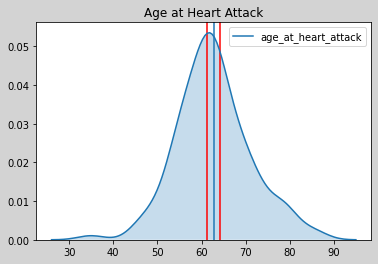

In [153]:
fig, ax = plt.subplots()
plt.axvline(x= mean)
plt.axvline(x= ci[0], color= 'r')
plt.axvline(x= ci[1], color= 'r')
plt.title('Age at Heart Attack')
fig.set_facecolor(color= 'lightgrey')
sns.kdeplot(df['age_at_heart_attack'], shade= True);

In [154]:
mean = df['still_alive'].mean()
sd = df['still_alive'].std()
n = df['still_alive'].count()
se = sd / n ** 0.5

ci = t.interval(alpha= 0.95, df= (n-1), loc= mean, scale= se)

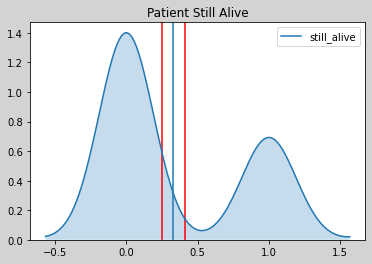

In [156]:
fig, ax = plt.subplots()
plt.axvline(x= mean)
plt.axvline(x= ci[0], color= 'r')
plt.axvline(x= ci[1], color= 'r')
plt.title('Patient Still Alive')
fig.set_facecolor(color= 'lightgrey')
sns.kdeplot(df['still_alive'], shade= True);

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics - IN YOUR OWN WORDS, DO NOT PLAGIARIZE- and then compare and contrast these two approaches to statistical inference.



Bayesisan statistics uses the known probability of events occuring to predict the probability of other events occuring that are related to the known event. The bayesian method is iterative because once a probability is calculated that probability can be then used to calculate an even more accurate likelihood of the next event occuring. The drawback of the bayesian method is that the method requires a high amount of computational processing power.

Frequentist statisics use a known sample of a population to draw conclusions with a certain confidence level about the entire population. Unlike Bayes, the frequentist method only uses information about events that have already occurred to draw conclusions.

# Stretch Goals: 
Do these to get a 3 on the corresponding sections. These are **not** required in order to pass the Sprint Challenge.

## Part 1: 

In order to get a 3 on this section make sure that you do not miss any of the specified data loading tasks, also, make sure that your work **throughout the entire sprint challenge** is particularly well commented, easy to follow, and thorough. 

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. 

## Part 3: 

Plot you confidence intervals using all three plotting methods that were demonstrated in class.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an exceptional grasp of these high level concepts.

In [ ]:
# YOUR CODE HERE - Feel free to add as many code and text cells as necessary